### Introducción

Este trabajo es el resultado de mi aprendizaje en el curso *"Learn Statistics with Python"* en la plataforma *Codecademy*, donde exploramos las diversas aplicaciones estadísticas utilizando el lenguaje de programación Python. En este proyecto, nos sumergiremos en el mundo de la atención médica en los Estados Unidos, analizando datos detallados sobre diferentes estados. Al construir este notebook, aplicaremos las técnicas y herramientas estadísticas que adquirimos para extraer insights significativos de los datos.

#### Media, Mediana y Moda

Comenzaremos buscando los tres indicadores más comunes y conocidos de una base de datos. Antes de empezar importaremos las librerías de Numpy y Pandas con las que trabajaremos a lo largo del notebook y también haremos una vista previa rápida de la estructura y los contenidos.

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

healthcare = pd.read_csv('healthcare.csv')

healthcare.head()

,DRG Definition,Provider Id,Provider Name,Provider Street Address,Provider City,Provider State,Provider Zip Code,Hospital Referral Region Description,Total Discharges,Average Covered Charges,Average Total Payments,Average Medicare Payments
0,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,AL - Dothan,91,32963.07,5777.24,4763.73
1,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10005,MARSHALL MEDICAL CENTER SOUTH,2505 U S HIGHWAY 431 NORTH,BOAZ,AL,35957,AL - Birmingham,14,15131.85,5787.57,4976.71
2,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10006,ELIZA COFFEE MEMORIAL HOSPITAL,205 MARENGO STREET,FLORENCE,AL,35631,AL - Birmingham,24,37560.37,5434.95,4453.79
3,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10011,ST VINCENT'S EAST,50 MEDICAL PARK EAST DRIVE,BIRMINGHAM,AL,35235,AL - Birmingham,25,13998.28,5417.56,4129.16
4,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10016,SHELBY BAPTIST MEDICAL CENTER,1000 FIRST STREET NORTH,ALABASTER,AL,35007,AL - Birmingham,18,31633.27,5658.33,4851.44


Para trabajar mejor, vamos a hacer otra visualización previa que nos proporcione una visión general rápida de la estructura de datos. Esta es especialmente útil para explorar conjuntos de datos grandes o desconocidos y nos permite tener información del tipo de datos en cada columna, la cantidad de valores no nulos y la cantidad total de elementos del DataFrame.

In [2]:
healthcare.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 163065 entries, 0 to 163064
Data columns (total 12 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   DRG Definition                        163065 non-null  object 
 1   Provider Id                           163065 non-null  int64  
 2   Provider Name                         163065 non-null  object 
 3   Provider Street Address               163065 non-null  object 
 4   Provider City                         163065 non-null  object 
 5   Provider State                        163065 non-null  object 
 6   Provider Zip Code                     163065 non-null  int64  
 7   Hospital Referral Region Description  163065 non-null  object 
 8    Total Discharges                     163065 non-null  int64  
 9    Average Covered Charges              163065 non-null  float64
 10   Average Total Payments               163065 non-null  float64
 11  

Al ver los nombres de las columnas encontramos que en algunas hay espacios antes, y tal vez también después, del nombre de la columna. Esto podría parecer un asunto menor, pero puede ser especialmente molesto a la hora de trabajar, por lo que rapidamente procederemos a eliminar esos espacios para poder trabajar mejor en el futuro. Luego volveremos a llamar a la función `.info()` para ver el antes y el después de nuestro trabajo.

In [3]:
healthcare.columns = healthcare.columns.str.strip()
healthcare.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 163065 entries, 0 to 163064
Data columns (total 12 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   DRG Definition                        163065 non-null  object 
 1   Provider Id                           163065 non-null  int64  
 2   Provider Name                         163065 non-null  object 
 3   Provider Street Address               163065 non-null  object 
 4   Provider City                         163065 non-null  object 
 5   Provider State                        163065 non-null  object 
 6   Provider Zip Code                     163065 non-null  int64  
 7   Hospital Referral Region Description  163065 non-null  object 
 8   Total Discharges                      163065 non-null  int64  
 9   Average Covered Charges               163065 non-null  float64
 10  Average Total Payments                163065 non-null  float64
 11  

Ahora si nos adentraremos en los objetivos de la sección: calcular la media, la mediana y la moda. Lo haremos sobre la columna "Average Total Payments".

In [4]:
#Calculamos la media
media_total_payments = round(np.average(healthcare['Average Total Payments']))
media_total_payments

9707

In [5]:
#Calculamos la mediana
median_total_payments = round(np.median(healthcare['Average Total Payments']))
median_total_payments

7214

In [6]:
from scipy import stats
moda_total_payments = stats.mode(healthcare['Average Total Payments'])
moda_total_payments

C:\Users\Sole\AppData\Local\Temp\ipykernel_1704\3043082665.py:2: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  moda_total_payments = stats.mode(healthcare['Average Total Payments'])


ModeResult(mode=array([4370.]), count=array([9]))

Ahora haremos un gráfico de barras y veremos cómo se distribuyen los tres valores que hemos obtenido dentro del mismo

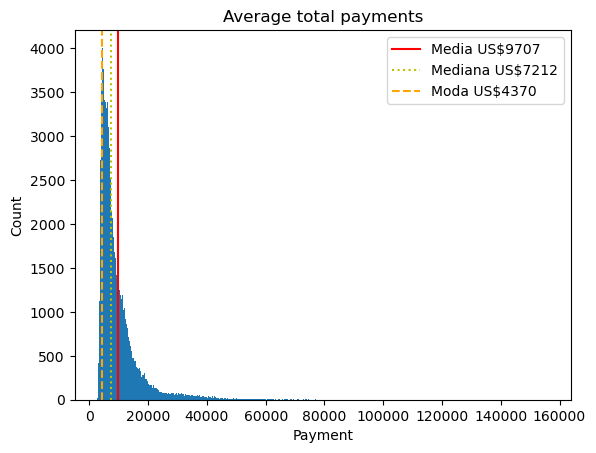

In [8]:
plt.hist(healthcare['Average Total Payments'], range=(2673, 156158.18), bins=1000)
plt.title("Average total payments")
plt.xlabel("Payment")
plt.ylabel("Count")
plt.axvline(media_total_payments, color='r', linestyle='solid', linewidth=1.5, label="Media US$9707")
plt.axvline(median_total_payments, color='y', linestyle='dotted', linewidth=1.5, label="Mediana US$7212")
plt.axvline(moda_total_payments[0], color='orange', linestyle='dashed', linewidth=1.5, label="Moda US$4370")
#plt.ylim(0, 100) #si descomentamos esta linea podremos ver en más detalle el eje Y del 0 al 100 y entender que los valores de nuestro df se repiten con poca frecuencia cuando tienen costos muy elevados
plt.legend()
plt.show()

#### Varianza y desvío standard
En esta sección, exploraremos la variabilidad en los costos de prácticas médicas utilizando la varianza y el desvío estándar. Estas herramientas nos permitirán comprender cuán dispersos están los costos en nuestro dataframe. La varianza cuantifica la extensión de esta dispersión, mientras que el desvío estándar proporciona una medida más interpretable, por lo que al calcular y analizarlas obtendremos una visión más profunda de la consistencia y la distribución de los costos asociados a diversas prácticas médicas.

In [9]:
varianza = round(np.var(healthcare['Average Total Payments']))
varianza

58746386

In [10]:
desvio_std = round(np.std(healthcare['Average Total Payments']))
desvio_std

7665

A continuación elaboraremos un gráfico de barras donde, además de la media, se marcará tres veces el desvío standard a cada lado de la misma.

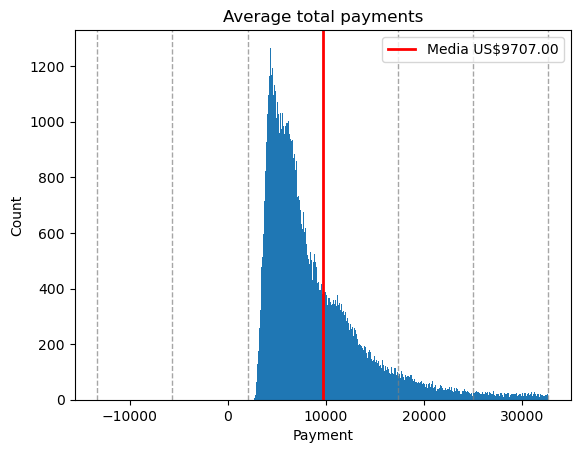

In [12]:
plt.hist(healthcare['Average Total Payments'], range=(media_total_payments - 3 * desvio_std, media_total_payments + 3 * desvio_std), bins=1000)
plt.title("Average total payments")
plt.xlabel("Payment")
plt.ylabel("Count")
plt.axvline(media_total_payments, color='r', linestyle='solid', linewidth=2, label=f"Media US${media_total_payments:.2f}")
for i in range(1, 4):
    plt.axvline(media_total_payments + i * desvio_std, color='gray', linestyle='dashed', linewidth=1, alpha=0.7)
    plt.axvline(media_total_payments - i * desvio_std, color='gray', linestyle='dashed', linewidth=1, alpha=0.7)
plt.legend()
plt.show()

#### Conclusiones preliminares

En el análisis de la variable "Average total payments", hemos calculado y examinado diversas medidas estadísticas para comprender la distribución de los datos. La media, que es de *US$9707*, nos proporciona un valor central que, en este contexto, puede no ser completamente representativo debido a la variabilidad en las prácticas médicas, que se distribuyen a lo largo de todos los estados de USA.

La mediana, con un valor de *US$7212*, se presenta como una métrica más robusta ante la presencia de posibles valores extremos, y su posición inferior con respecto a la media sugiere un sesgo hacia la derecha en la distribución de los datos. Este sesgo se confirma al observar el histograma, el cual exhibe una concentración de datos hacia valores superiores.

La moda, que corresponde a *US$4370*, indica el valor más frecuente en la variable. Es interesante notar que esta moda refleja un gasto más bajo en comparación con la media, sugiriendo que hay una mayor frecuencia de prácticas médicas con costos más bajos en el conjunto de datos.

Ahora, al considerar la varianza y el desvío estándar, que son 58746386 y 7665 respectivamente, podemos profundizar en la dispersión de los datos. La varianza mide la amplitud de la distribución, indicando cuánto se alejan los valores individuales de la media. En este caso, una varianza relativamente alta sugiere una considerable variabilidad en los pagos totales de las prácticas médicas.

El desvío estándar, siendo la raíz cuadrada de la varianza, nos proporciona una medida de dispersión más intuitiva. Con un valor de 7665, podemos interpretar que, en promedio, los pagos totales tienden a desviarse alrededor de esta cantidad de la media. Un desvío estándar más alto indica una mayor dispersión de los datos.

En resumen, los resultados de la varianza y el desvío estándar enfatizan la variabilidad y dispersión significativas en los pagos totales de las prácticas médicas. Esto refuerza la noción de que la media puede no ser completamente representativa, y subraya la importancia de considerar tanto medidas centrales como medidas de dispersión al analizar conjuntos de datos complejos y sesgados.

#### Segunda parte del análisis
Como dijimos anteriormente, en la columna 'DRG Definition' de nuestro dataframe agrupa diagnosticos que se realizan con distinta frecuencia, y de distinto nivel de complejidad y costo, por lo tanto la media es una estadística que no nos dice mucho. A continuación analizaremos cuales son los diagnósticos más y menos frecuentes.
Primero llamaremos a la función `.describe()` para saber cuantos diagnósticos diferentes tiene nuestro dataframe y cual es el diagnóstico más común.

In [13]:
healthcare['DRG Definition'].describe()

count                                     163065
unique                                       100
top       194 - SIMPLE PNEUMONIA & PLEURISY W CC
freq                                        3023
Name: DRG Definition, dtype: object

Para conocer cuales son cada uno de los 100 diagnósticos que están codificados en el dataframe, llamaremos a la función `.unique()`

In [14]:
healthcare['DRG Definition'].unique()

array(['039 - EXTRACRANIAL PROCEDURES W/O CC/MCC',
       '057 - DEGENERATIVE NERVOUS SYSTEM DISORDERS W/O MCC',
       '069 - TRANSIENT ISCHEMIA',
       '064 - INTRACRANIAL HEMORRHAGE OR CEREBRAL INFARCTION W MCC',
       '065 - INTRACRANIAL HEMORRHAGE OR CEREBRAL INFARCTION W CC',
       '066 - INTRACRANIAL HEMORRHAGE OR CEREBRAL INFARCTION W/O CC/MCC',
       '074 - CRANIAL & PERIPHERAL NERVE DISORDERS W/O MCC',
       '101 - SEIZURES W/O MCC', '149 - DYSEQUILIBRIUM',
       '176 - PULMONARY EMBOLISM W/O MCC',
       '177 - RESPIRATORY INFECTIONS & INFLAMMATIONS W MCC',
       '189 - PULMONARY EDEMA & RESPIRATORY FAILURE',
       '178 - RESPIRATORY INFECTIONS & INFLAMMATIONS W CC',
       '190 - CHRONIC OBSTRUCTIVE PULMONARY DISEASE W MCC',
       '191 - CHRONIC OBSTRUCTIVE PULMONARY DISEASE W CC',
       '193 - SIMPLE PNEUMONIA & PLEURISY W MCC',
       '194 - SIMPLE PNEUMONIA & PLEURISY W CC',
       '192 - CHRONIC OBSTRUCTIVE PULMONARY DISEASE W/O CC/MCC',
       '195 - SIMPLE P

Para ver cómo continuará nuestro análisis, buscaremos los 10 diagnósticos cuyo tratamiento es más costoso y más económico. Una vez que obtengamos ese listado de los más costosos y más económicos. Veremos en qué estados se registran.

In [15]:
#Diagnósticos con tratamiento más costoso
healthcare_costoso = (healthcare.sort_values(by='Average Total Payments', ascending=False)).head(10)
print(healthcare_costoso['DRG Definition'].value_counts())
print(healthcare_costoso['Provider State'].value_counts())

#Acá cuando vemos los primeros 10 vemos que se repiten los estados 4(6 veces) y NY (4 veces), IN, PA una vez cada uno, 
#capaz CA y NY son los dos estados más caros para la salud, hay que revisar que pasa en los demas dx

207 - RESPIRATORY SYSTEM DIAGNOSIS W VENTILATOR SUPPORT 96+ HOURS         3
870 - SEPTICEMIA OR SEVERE SEPSIS W MV 96+ HOURS                          3
853 - INFECTIOUS & PARASITIC DISEASES W O.R. PROCEDURE W MCC              1
460 - SPINAL FUSION EXCEPT CERVICAL W/O MCC                               1
329 - MAJOR SMALL & LARGE BOWEL PROCEDURES W MCC                          1
469 - MAJOR JOINT REPLACEMENT OR REATTACHMENT OF LOWER EXTREMITY W MCC    1
Name: DRG Definition, dtype: int64
CA    4
NY    4
IN    1
PA    1
Name: Provider State, dtype: int64


In [16]:
#Diagnósticos con tratamiento más económico
healthcare_economico = (healthcare.sort_values(by='Average Total Payments', ascending=True)).head(10)
print(healthcare_economico['DRG Definition'].value_counts())
print(healthcare_economico['Provider State'].value_counts())

#Entre los trátamientos más económicos tenemos 2 WV 2 IN, y el diagnostico más repetido es Chest pain

313 - CHEST PAIN                                              9
310 - CARDIAC ARRHYTHMIA & CONDUCTION DISORDERS W/O CC/MCC    1
Name: DRG Definition, dtype: int64
WV    2
IN    2
OH    1
AL    1
OK    1
TX    1
MO    1
TN    1
Name: Provider State, dtype: int64


Antes de continuar vamos a calcular las medias de los estados de California (CA), Nueva York(NY), West Virginia (WV) e Indiana (IN). los primeros estados son los que más se repetían cuando buscamos entre los 10 tratamientos más costosos del dataframe, los segundos son los estados que más se repetían cuando buscamos los diez tratamientos más económicos. Indiana tiene un interés especial porque si bien aparecía una sóla vez entre los 10 más costosos, también aparecía en la selección de los menos costosos. De esta forma intentaremos ver, aún sabiendo lo sesgado de intentar analizar datos tan complejos sólo con la media, si en alguno de los estados es marcadamente más alto que los demás.

In [17]:
#Acá creamos 4 df que reunen la información del mismo estado
ca_healthcare = healthcare[healthcare['Provider State'] == "CA"]
ny_healthcare = healthcare[healthcare['Provider State'] == "NY"]
wv_healthcare = healthcare[healthcare['Provider State'] == "WV"]
in_healthcare = healthcare[healthcare['Provider State'] == "IN"]

In [18]:
ca_healthcare_mean = np.mean(ca_healthcare['Average Total Payments'])
ca_healthcare_sdt = np.std(ca_healthcare['Average Total Payments'])
ny_healthcare_mean = np.mean(ny_healthcare['Average Total Payments'])
ny_healthcare_sdt = np.std(ny_healthcare['Average Total Payments'])
wv_healthcare_mean = np.mean(wv_healthcare['Average Total Payments'])
wv_healthcare_sdt = np.std(wv_healthcare['Average Total Payments'])
in_healthcare_mean = np.mean(in_healthcare['Average Total Payments'])
in_healthcare_sdt = np.std(in_healthcare['Average Total Payments'])
print('El promedio total de pagos en el estado de California es US$' + str(round(ca_healthcare_mean)) + ', mientras que el desvío standard es '+ str(round(ca_healthcare_sdt)) +'. En Nueva York es US$' + str(round(ny_healthcare_mean))+ ' y el desvío standard '+ str(round(ny_healthcare_sdt)) +  '. En West Virginia es US$'+ str(round(wv_healthcare_mean)) + ' y el desvío standard '+ str(round(ca_healthcare_sdt)) + '. Por último en Indiana el promedio es US$'+ str(round(in_healthcare_mean)) + ' y el desvío standard ' + str(round(in_healthcare_sdt))+'.')

El promedio total de pagos en el estado de California es US$12630, mientras que el desvío standard es 10166. En Nueva York es US$11795 y el desvío standard 10060. En West Virginia es US$7968 y el desvío standard 10166. Por último en Indiana el promedio es US$8756 y el desvío standard 6686.


Ahora seguiremos indagando los diagnósticos y las prácticas más y menos frecuentes

In [ ]:
#Cinco diagnósticos más frecuentes
#practicas_medicas_mas_frec = (healthcare['DRG Definition'].value_counts()).head()
#practicas_medicas_mas_frec

In [ ]:
#Cinco diagnósticos menos frecuentes
#practicas_medicas_menos_frec = (healthcare['DRG Definition'].value_counts(ascending=True)).head()
#practicas_medicas_menos_frec

In [ ]:
#Calculo del porcentaje de costos que se encuentra por debajo de la media
less_media = np.mean(avg_total_payments < 9707)
less_media

A continuación buscaremos saber cuantas veces los valores de los pagos superan los US$100.000 y qué porcentaje en relación al total de las prácticas son las que superan este monto, para intentar ver la representatividad que tienen en relación a todo el dataframe.